# Visualising BTgym environment in 12 steps.
****
Call to **`env.render(<mode>)`** will return environment visualisation as numpy array (whith x height x 4). This rgb array can viewed or saved to image file using PILLOW or matpltlib methods.
- Using rgb arrays seems to be good option as it is highly environment agnostic.
- Currently, implemntation of env.render() method supports three modes:
    - **`human`**: human-readable one-step state visualisation of price lines and text information;
    - **`agent`**: if featurized state observation is computed, chances are it is better visualized as 2D image, enabling to see at what agent is feeded;
    - **`episode`**: after single episdoe is finished, btgym can visualise baktest run results. This feature relies on backtrader `Cerebro.plot()` method to perform rendering.
****


### 1. Let's run some examples:

In [1]:
import itertools
import random
import os

import sys
sys.path.insert(0,'..')

import IPython.display as Display
import PIL.Image as Image

from btgym import BTgymEnv

****
### 2. Define couple of handy functions:

In [2]:
def show_rendered_image(rgb_array):
    """
    Convert numpy array to RGB image using PILLOW and
    show it inline using IPykernel.
    """
    Display.display(Image.fromarray(rgb_array))

def render_all_modes(env):
    """
    Retrieve and show environment renderings
    for all supported modes.
    """
    for mode in env.metadata['render.modes']:
        print('[{}] mode:'.format(mode))
        show_rendered_image(env.render(mode))

def take_some_steps(env, some_steps):
    """Just does it. Acting randomly."""
    for step in range(some_steps):
        rnd_action = int((env.action_space.n)*random.random())
        o, r, d, i = env.step(rnd_action)
        if d:
            print('Episode finished,')
            break
    print(step+1, 'steps made.\n')


****
### 3. Set environment :
Like this:
- time embedding dimension is 30;
- agent will interact with environment every 5th step (other steps actions are assumed to be 'hold');
- use some custom rendering parameters(see below);
- do not chat:

In [3]:
env = BTgymEnv(filename='../examples/data/DAT_ASCII_EURUSD_M1_2016.csv',
               state_shape=(4,30),
               skip_frame=5,
               start_cash=100,
               render_ylabel='Price Lines',
               render_size_episode=(12,8),
               render_size_human=(8, 3.5),
               render_size_agent=(10, 3.5),
               render_dpi=75,
               verbose=0,
              )

****
### 3. Initial renderings for all modes are `none`-like:
- for demonstration, let's explicitly start server, not calling reset(), putting server into `Control` mode. One shouldn't do that usually as server will autostart upon reset().
- ask for renderings;
- see that no actual renderings avilable:

[human] mode:


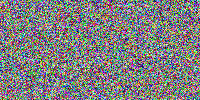

[agent] mode:


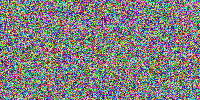

[episode] mode:


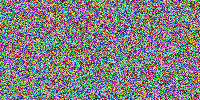

In [4]:
env._start_server()
render_all_modes(env)

****
### 4. Start episode:
- got initial state renderings (5th actually, since we use skip-frames),
- no **`episode`** rendering yet:

[human] mode:


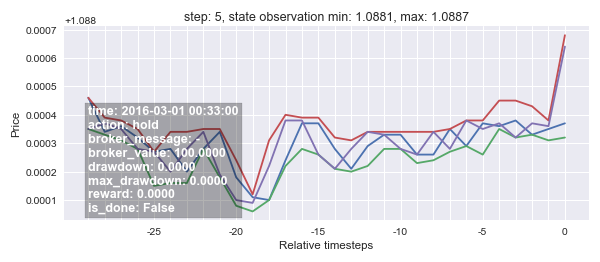

[agent] mode:


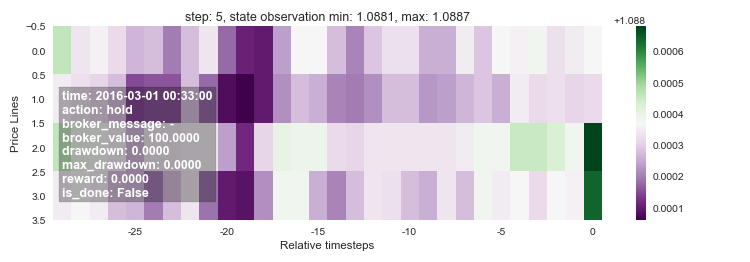

[episode] mode:


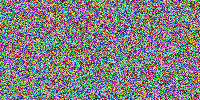

In [5]:
env.reset()
render_all_modes(env)

***
### 5. Take 100 steps (x5):


100 steps made.

[human] mode:


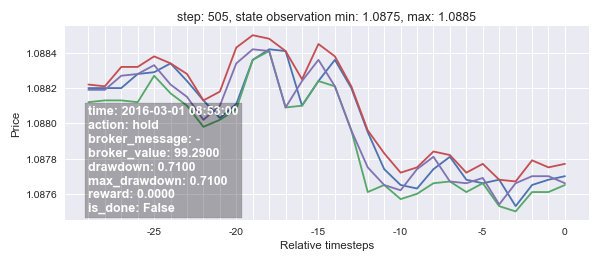

[agent] mode:


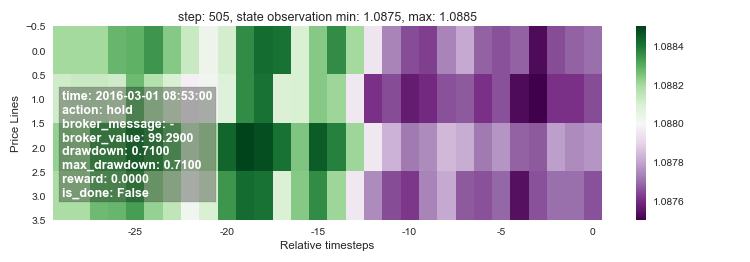

[episode] mode:


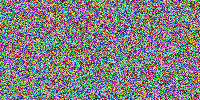

In [8]:
take_some_steps(env, 100)
render_all_modes(env)

***
### 6. Now run it until episode is finished:

Episode finished,
468 steps made.

[human] mode:


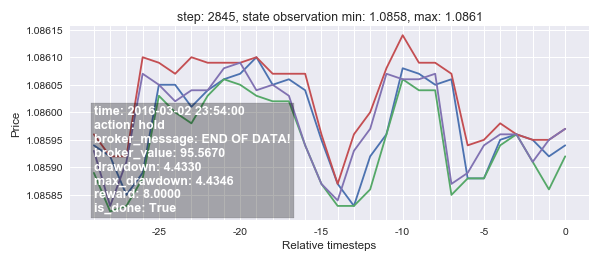

[agent] mode:


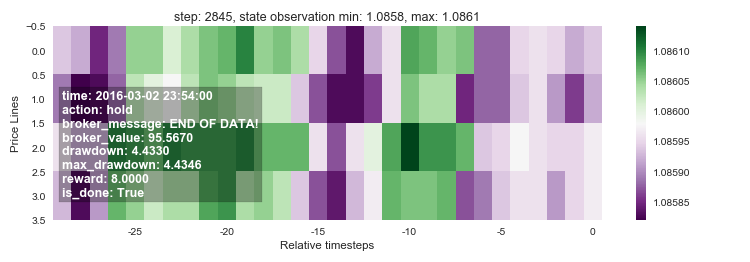

[episode] mode:


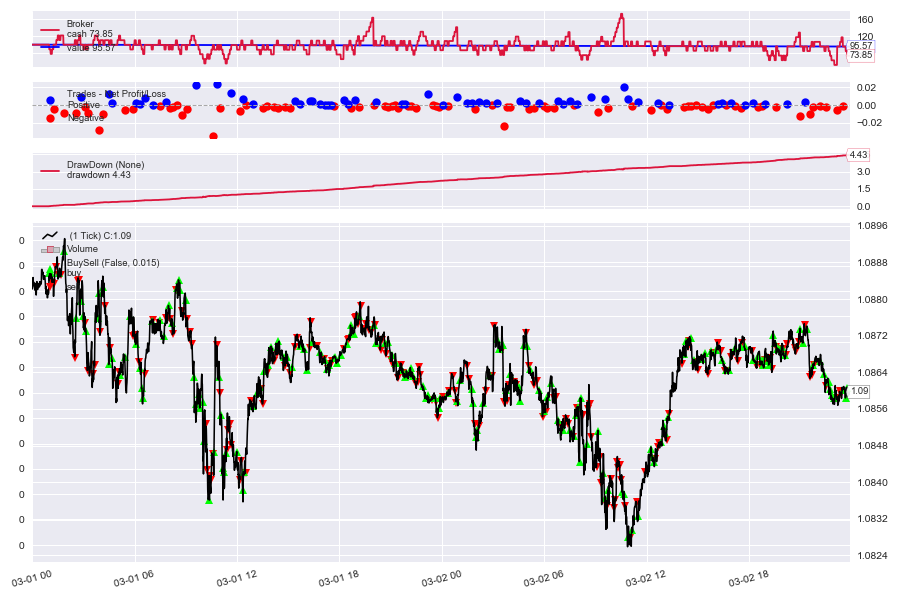

In [9]:
take_some_steps(env, 10000)
render_all_modes(env)

##### ... now we got it all.

***
### 7. Run another episode for a while and note:
- **`state`** renderings are up to date;
- still getting old **`episode`** picture.

50 steps made.

[human] mode:


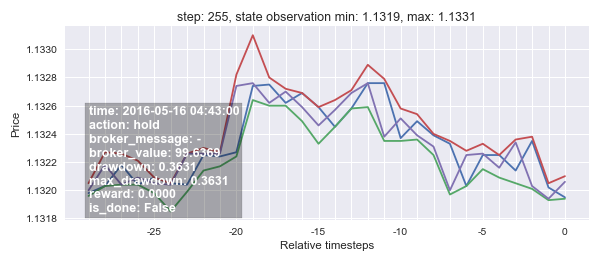

[agent] mode:


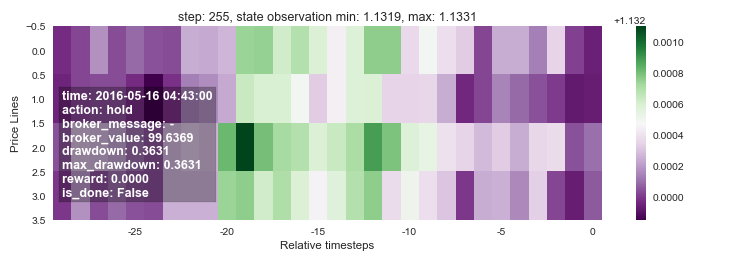

[episode] mode:


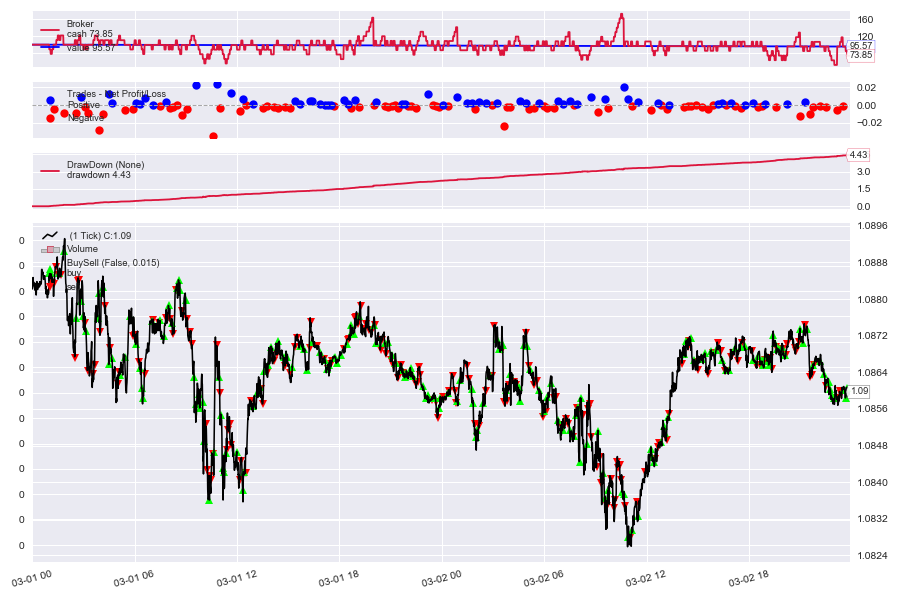

In [10]:
env.reset()
take_some_steps(env, 50)
render_all_modes(env)

****
### 8. Force episode to stop early
by calling hidden method env._force_control_mode() - not usually needed for normal opration - and see:
- episode picture got updated:

[human] mode:


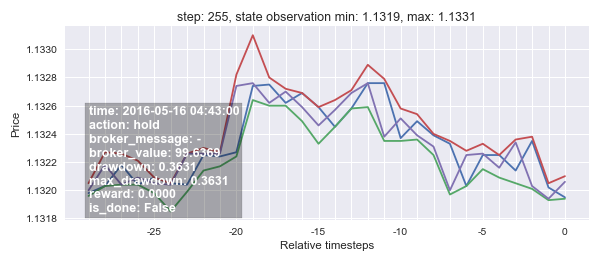

[agent] mode:


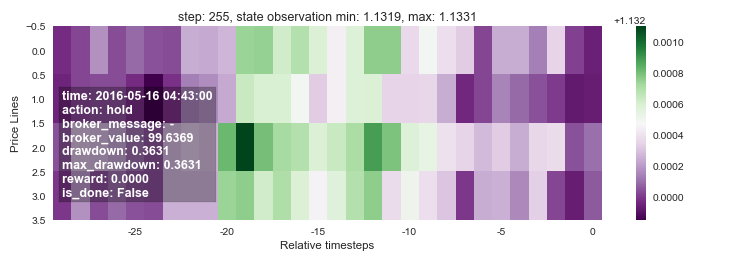

[episode] mode:


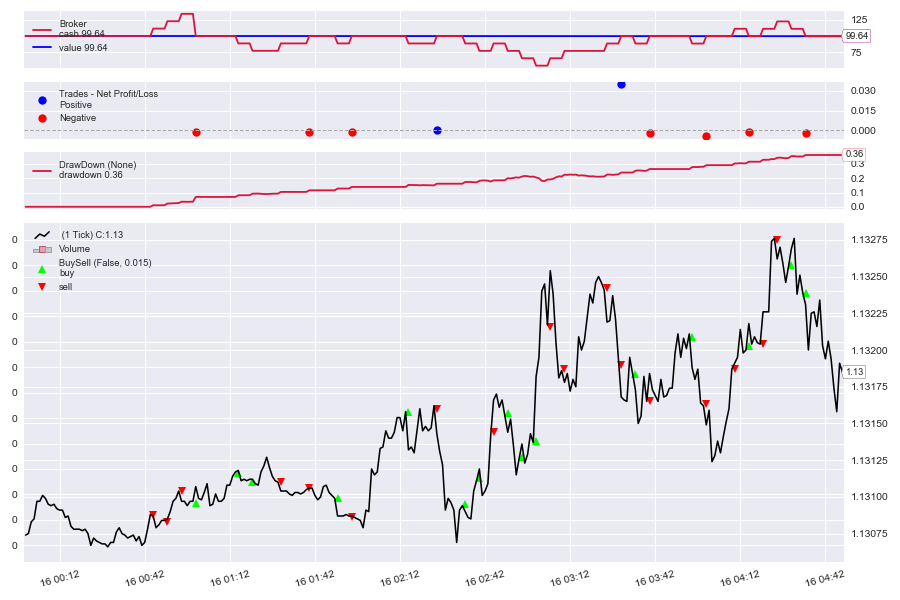

In [12]:
env._force_control_mode()
render_all_modes(env)

***
### 9. The logic of render() method is as follows:

- **Renders given mode if possible, else just passes last already rendered image:**

            If `episode` is finished:
                if mode = 'human':
                    return stored image from last render `human` call
                if mode = `agent`:
                    return stored image from last render `agent` call
                if mode = `episode`:
                    render last finished episode,
                    update and return `episode` image.
                
            If `episode` is running:
                if mode = `human`:
                    render current state observation in conventional format,
                    update  and return `human` image;
                if mode = `agent`:
                    render observation 'as seen by agent',
                    update and return stored `agent` image.
                if mode = `episode`:
                    return stored image of last finished  `episode`.
                    
            if server process has been stopped:
                rises exception.

***
### 10. Appearance can be controlled to some degree:
**...with these environment kwargs** (default values are given):
```
    render_agent_as_image = True
    render_size_human = (6, 3.5)
    render_size_agent = (7, 3.5)
    render_size_episode = (12,8)
    render_dpi=75
    render_plotstyle = 'seaborn'
    render_cmap = 'PRGn'
    render_xlabel = 'Relative timesteps'
    render_ylabel = 'Value'
    render_title = 'step: {}, state observation min: {:.4f}, max: {:.4f}'
    render_boxtext = dict(fontsize=12,
                          fontweight='bold',
                          color='w',
                          bbox={'facecolor': 'k', 'alpha': 0.3, 'pad': 3},
                          )
```

### Try this:

Episode finished,
56 steps made.

[human] mode:


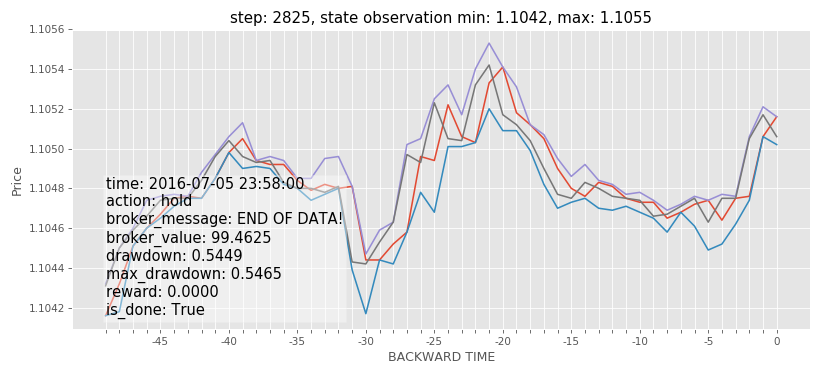

[agent] mode:


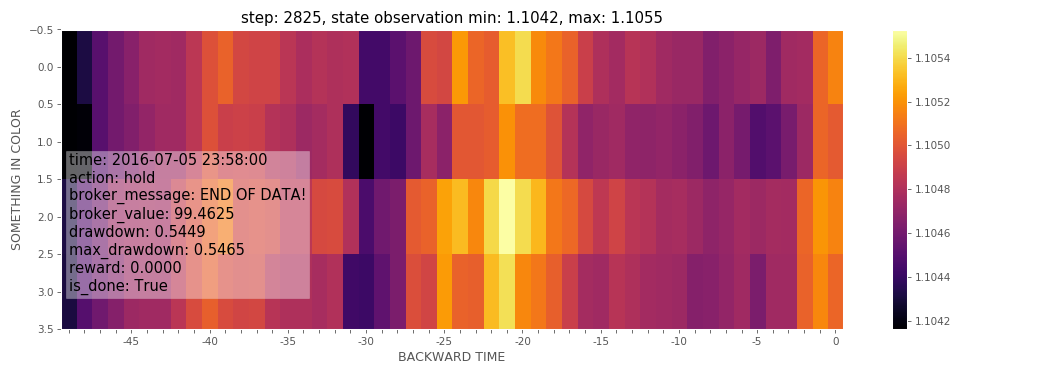

[episode] mode:


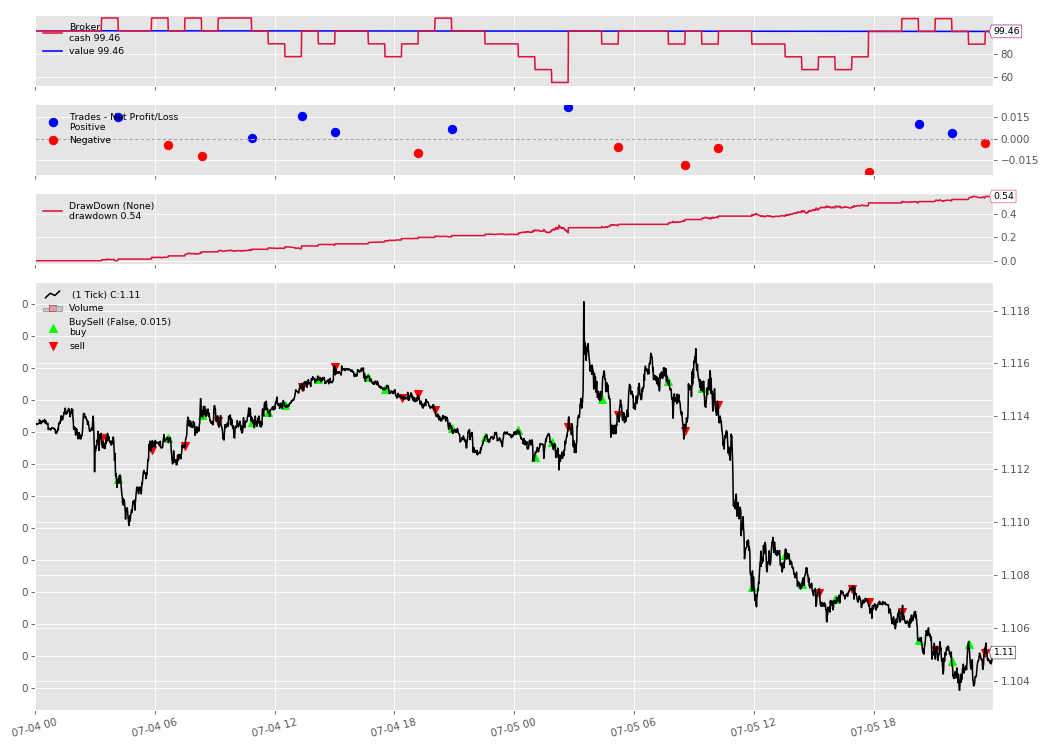

In [25]:
env.close()

env = BTgymEnv(filename='../examples/data/DAT_ASCII_EURUSD_M1_2016.csv',
               state_shape=(4,50),
               skip_frame=50,
               start_cash=100,
               render_ylabel='SOMETHING IN COLOR',
               render_xlabel = 'BACKWARD TIME',
               render_size_episode=(14, 10),
               render_size_human=(11, 5),
               render_size_agent=(14, 5),
               render_cmap = 'inferno',
               render_plotstyle = 'ggplot',
               render_dpi=75,
               verbose=0,
               render_boxtext = dict(fontsize=14,
                          fontweight='regular',
                          color='k',
                          bbox={'facecolor': 'w', 'alpha': 0.4, 'pad': 3},
                          )
              )

env.reset()
take_some_steps(env, 1000)
render_all_modes(env)


***
### 11. Finally, using matplotlib:
for inline picture plotting is also an option...

In [27]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

...though one have to fiddle around with **`figsize`** parameter to get decent picture quality:

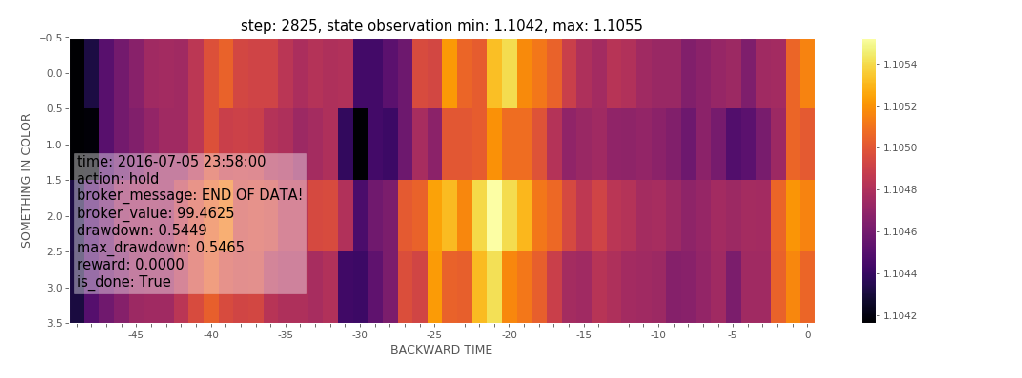

In [30]:
# Pyplot setup for rgb_array image:
plt.figure(figsize=(14,10))
plt.style.use('ggplot')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.tight_layout(pad=0)

# Here:
plt.imshow(env.render('agent'))
plt.show()

***
### 12. Note:
- set **`dpi=300`** to get print quality renderings;
- save images to files using **`PIL: Image.save()`** or **`Matplotlib: pyplot.savefig()`** methods.

In [31]:
# Clean up:
env.close()